# SquidGame Sentiment Analysis 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re 
#nltk.download('stopwords') 
#stopwords are the words which 
#are useless in a data it comes under preprocessing
#or commonly used words such as "the", "and", "or".
stem = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string

df = pd.read_csv("tweets_v8.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [2]:
df.isnull().sum()

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64

As the "user_location" and "user_description" contains a large number of null values we can drop those two columns.

In [3]:
df = df.drop(columns = 'user_location',axis =1)
df = df.drop(columns = 'user_description',axis=1)
df.head()

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


The “text” column in the dataset contains the opinions of the users of Twitter about the squid game, as these are social media opinions, so this column needs to be prepared before any analysis.

In [4]:
stopword = set(stopwords.words('english'))

In [5]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(" ") if word not in stopword]
    text = " ".join(text)
    return text
df['text'] = df['text'].apply(clean)

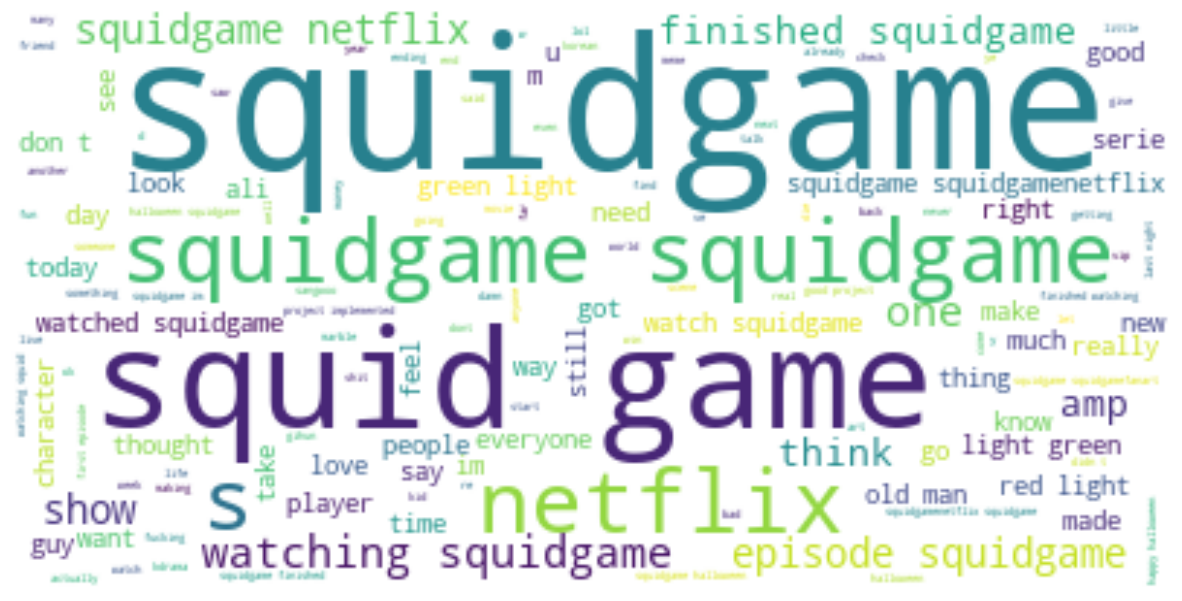

In [6]:
text = ' '.join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.show()

Creating thre extra columns naming Postive, Negative, Neutral to categorize the opinions which are expressed for analysis

In [7]:
#nltk.download('vader_lexicon')
senti = SentimentIntensityAnalyzer()
df["Positive"] = [senti.polarity_scores(i)["pos"] for i in df["text"]]
df["Negative"] = [senti.polarity_scores(i)["neg"] for i in df["text"]]
df["Neutral"] = [senti.polarity_scores(i)["neu"] for i in df["text"]]
df = df[['text','Positive','Negative','Neutral']]
df.head()

,text,Positive,Negative,Neutral
0,life hits time poverty strikes yougong yoo le...,0.14,0.337,0.523
1,marble episode squidgame ruined 😭😭😭,0.00,0.437,0.563
2,squidgame time,0.00,0.000,1.000
3,blood slideim joining squidgame thing im alre...,0.00,0.301,0.699
4,two first games players killed mask guys bloo...,0.00,0.543,0.457


In [8]:
pos = sum(df['Positive'])
neg = sum(df['Negative'])
neu = sum(df['Neutral'])

def senti_score(a,b,c):
    if(a>b) and (a>c):
        print('POSTIVE 😃')
    elif(b>a)and(b>c):
        print('NEGATIVE 🤢')
    else:
        print("NEUTRAL 😗")

senti_score(pos,neg,neu)

print("Positive:",pos)
print("Negative:",neg)
print("Neutral:",neu)

NEUTRAL 😗
Positive: 12960.91099999963
Negative: 6013.988000000007
Neutral: 61038.10200000102
